En la siguiente sección se investigará y discutirá la pregunta:
¿Es posible predecir el género musical mediante los otros atributos de la tabla?
Para ello se utilizaran distinas técnicas de preprocesamiento y se usarán tres técnicas de clasificación:
    
    -K neighbors algorithm
    -Random Forest
    -Support Vector Machine

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score, confusion_matrix,classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler



In [3]:

df_spotify = pd.read_csv('../data/data_principal.csv', encoding="UTF-8")
df = df_spotify.copy()

Se limpia el data frame de duplicados y valores Null.

In [4]:
df_spotify.drop(['Unnamed: 0','track_id','album_name'], axis = 1, inplace = True)
df_spotify.shape
df_spotify.info()
df_spotify.nunique()
df_spotify_sin_duplicados = df_spotify.drop_duplicates()
df_spotify_limpio = df_spotify_sin_duplicados.dropna()
df_spotify_kneighbors = df_spotify_limpio.copy()
df_spotify_forest = df_spotify_limpio.copy()
print(f"Tamaño del DataFrame original: {len(df_spotify)}")
print(f"Tamaño del DataFrame después de eliminar duplicados: {len(df_spotify_sin_duplicados)}")
df_spotify_limpio.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   track_name        113999 non-null  object 
 2   popularity        114000 non-null  int64  
 3   duration_ms       114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

,count,mean,std,min,25%,50%,75%,max
popularity,106948.0,35.351993,21.339181,0.000,20.00000,37.000000,51.000000,100.000
duration_ms,106948.0,229985.110633,108539.615305,8586.000,175489.50000,214761.000000,264293.000000,5237295.000
danceability,106948.0,0.565018,0.173769,0.000,0.45400,0.578000,0.693000,0.985
energy,106948.0,0.642839,0.252462,0.000,0.47100,0.686000,0.856000,1.000
key,106948.0,5.303559,3.555856,0.000,2.00000,5.000000,8.000000,11.000
loudness,106948.0,-8.303670,5.065070,-49.531,-10.08200,-7.056000,-5.019000,4.532
mode,106948.0,0.634121,0.481678,0.000,0.00000,1.000000,1.000000,1.000
speechiness,106948.0,0.085466,0.107613,0.000,0.03590,0.049000,0.085000,0.965
acousticness,106948.0,0.313760,0.332777,0.000,0.01540,0.168000,0.596000,0.996
instrumentalness,106948.0,0.163338,0.315018,0.000,0.00000,0.000058,0.068525,1.000


Comenzaremos aplicando la técnica de K-Neighbors. Para ello se tiene que considerar que este algoritmo no funciona bien con muchas dimensiones y se deben escalar los datos. Para lo anterior utilizaremos maxMinScaler de Sickit. Además, debemos buscar el mejor K.

In [5]:
##Escalando los datos y eliminando atributos para probar K Neighbors

atributos_neighbors = [ 'tempo', 'danceability', 'loudness', 'energy','speechiness','acousticness','duration_ms']
y = df_spotify_kneighbors['track_genre']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_spotify_kneighbors[atributos_neighbors])
print(y)
print(X_scaled)

0            acoustic
1            acoustic
2            acoustic
3            acoustic
4            acoustic
             ...     
113995    world-music
113996    world-music
113997    world-music
113998    world-music
113999    world-music
Name: track_genre, Length: 106948, dtype: object
[[0.36124534 0.68629442 0.79139152 ... 0.14818653 0.03232932 0.0424732 ]
 [0.31839735 0.42639594 0.59737713 ... 0.07906736 0.92771084 0.02697109]
 [0.31364331 0.44467005 0.73612267 ... 0.05772021 0.21084337 0.03867876]
 ...
 [0.54393274 0.63857868 0.71464773 ... 0.04352332 0.87048193 0.05027627]
 [0.55865095 0.59593909 0.71475871 ... 0.0307772  0.38253012 0.05265296]
 [0.32541952 0.53401015 0.72742911 ... 0.07512953 0.68373494 0.04460757]]


In [ ]:
##Buscamos el mejor K

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
neigh_1 = KNeighborsClassifier(5)

neigh_1.fit(X_train, y_train)

y_pred_1 = neigh_1.predict(X_test)
f1_1= accuracy_score(y_test, y_pred_1)
#prueba con weigts
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
neigh_2 = KNeighborsClassifier(5, weights='distance')

neigh_2.fit(X_train_2, y_train_2)

y_pred_2 = neigh_2.predict(X_test_2)
f1_2= accuracy_score(y_test, y_pred_2)

print(f"F1 para kneighbors sin weigths: {f1_1}")
print(f"F1 para kneighbors con weigths: {f1_2}")


F1 para kneighbors sin weigths: 0.11491351098644226
F1 para kneighbors con weigths: 0.13314633006077606


Ahora probaremos con Random Forest. Primero procesaremos los datos, disminuyendo las clases de géneros con un diccionario y luego escalaremos los datos con StandarScaler.

In [7]:
##Primer intento sin procesar los datos



atributos = [ 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

X = df_spotify_forest[atributos] 
y = df_spotify_forest['track_genre']


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5,class_weight='balanced', random_state=42)

rfc.fit(X_train_3, y_train_3)

y_pred_3 = rfc.predict(X_test_3)

print(f1_score(y_test_3, y_pred_3, average='macro'))

class_report = classification_report(y_test_3, y_pred_3)
print(class_report)


0.29403126556194586
                   precision    recall  f1-score   support

         acoustic       0.26      0.26      0.26       194
         afrobeat       0.39      0.31      0.35       199
         alt-rock       0.03      0.02      0.02       176
      alternative       0.03      0.04      0.03       158
          ambient       0.30      0.34      0.32       196
            anime       0.24      0.20      0.22       200
      black-metal       0.56      0.59      0.58       199
        bluegrass       0.39      0.59      0.47       199
            blues       0.09      0.05      0.06       159
           brazil       0.08      0.06      0.07       199
        breakbeat       0.58      0.49      0.53       199
          british       0.09      0.04      0.05       194
         cantopop       0.30      0.28      0.29       200
    chicago-house       0.55      0.55      0.55       199
         children       0.48      0.45      0.46       195
            chill       0.18      0

In [8]:

dic_generos = {
    'latin': ['latin', 'latino', 'reggaeton', 'spanish', 'sertanejo', 'samba', 'tango','brazil', 'forro', 'salsa','mpb'],
    'rock_clasico' :['rock', 'alt-rock', 'rock-n-roll', 'garage', 'rockabilly', 'psych-rock', 'j-rock'],
    'metal': ['death-metal', 'black-metal', 'heavy-metal', 'metal-core', 'grindcore', 'metal','metalcore'],
    'rock_intenso' : ['punk', 'punk-rock', 'hardcore', 'grunge', 'emo', 'goth', 'hard-rock'],
    'pop': [ 'pop', 'world-music', 'pop-film', 'power-pop','british'],
    'pop-asia':['k-pop', 'j-pop', 'mandopop', 'cantopop', 'j-idol', 'j-dance'],
    'hiphop': ['trip-hop', 'hip-hop'],
    'disco': ['groove', 'dance', 'dancehall','disco'],
    'tech_club' : ['house', 'deep-house', 'minimal', 'minimal-techno','techno', 'chicago-house', 'detroit-techno', 'electro', 'club', 'hardstyle','edm'],
    'tech_exp' : ['dubstep', 'idm', 'breakbeat', 'electronic', 'industrial','afrobeat', 'drum-and-bass', 'dub', 'party'],
    'chill': ['study', 'ambient', 'acoustic', 'sleep', 'chill', 'trance', 'new-age','progressive-house','sad'],
    'reggae': ['ska', 'reggae','dancehall'],
    'classic': ['opera', 'classical', 'piano','gospel','show-tunes'],
    'kids': ['kids', 'disney', 'children'],
    'country': ['bluegrass', 'honky-tonk','country'],
    'blues': ['soul', 'funk', 'blues','r-n-b','jazz'],
    'romance': ['romance','singer-songwriter','songwriter'],
    'folklore': ['folk', 'turkish', 'iranian','indian','pagode','german','swedish','malay','french'],
    'other':['happy','comedy', 'guitar','anime'],
    'indie':['indie','alternative','indie-pop','synth-pop']
}

dic_generos_numerico = {}
i = 0
for genero_principal, subgeneros in dic_generos.items():
    dic_generos_numerico[genero_principal] = i
    i += 1

print(dic_generos_numerico)


mapeo_directo = {}
for genero_general, subgeneros in dic_generos.items():
    for sub in subgeneros:
        mapeo_directo[sub] = genero_general

df_spotify_forest['genero_general'] = df_spotify_forest['track_genre'].map(mapeo_directo)

df_spotify_forest['genero_numeric'] = df_spotify_forest['genero_general'].map(dic_generos_numerico)

df_spotify_filtrado = df_spotify_forest.dropna(subset=['genero_numeric']).copy()
df_spotify_filtrado['genero_numeric'] = df_spotify_filtrado['genero_numeric'].astype(int)

# Imprimir el DataFrame resultante (con la nueva columna numérica)
#print(df_spotify_filtrado)


#print("\nDistribución de los géneros numéricos:")
#print(df_spotify_filtrado['genero_numeric'].value_counts().sort_index())
df_spotify_filtrado.head()

{'latin': 0, 'rock_clasico': 1, 'metal': 2, 'rock_intenso': 3, 'pop': 4, 'pop-asia': 5, 'hiphop': 6, 'disco': 7, 'tech_club': 8, 'tech_exp': 9, 'chill': 10, 'reggae': 11, 'classic': 12, 'kids': 13, 'country': 14, 'blues': 15, 'romance': 16, 'folklore': 17, 'other': 18, 'indie': 19}


,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genero_general,genero_numeric
0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,chill,10
1,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,chill,10
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,chill,10
3,Kina Grannis,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,chill,10
4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,chill,10


In [9]:
##guardamos las columnas objects (categoricas)
cat_cols = df_spotify_limpio.select_dtypes(include=['object']).columns.to_list()

#guardamos als columnas numéricas
num_cols = [col for col in df_spotify_limpio.columns if col not in cat_cols]
cat_cols
##Nos quedamos con el género musical en forma numérica
df_spotify_filtrado.drop(['genero_general'], axis = 1, inplace = True)
#df_spotify_filtrado.head()

In [10]:
df_spotify_filtrado[cat_cols] = df_spotify_filtrado[cat_cols].apply(LabelEncoder().fit_transform)
y = df_spotify_filtrado['genero_numeric']
X=df_spotify_filtrado.drop(['genero_numeric'], axis = 1)
X.head

<bound method NDFrame.head of         artists  track_name  popularity  duration_ms  explicit  danceability  \
0         10357       11741          73       230666     False         0.676   
1          3287       22528          55       149610     False         0.420   
2         12397       60774          57       210826     False         0.438   
3         14839        9580          71       201933     False         0.266   
4          5255       25689          82       198853     False         0.618   
...         ...         ...         ...          ...       ...           ...   
113995    22486       53329          21       384999     False         0.172   
113996    22486       65090          22       385000     False         0.174   
113997     4952       38207          22       271466     False         0.629   
113998    18534       21507          41       283893     False         0.587   
113999     4952        5999          22       241826     False         0.526   

        e

In [11]:
sc = StandardScaler()
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,-0.595442,-1.177316,1.764275,0.006273,-0.304888,0.638683,-0.720267,-1.210279,0.307533,-1.316490,0.534641,-0.846098,-0.518504,0.738154,0.947098,-1.150739,0.219841,-1.710229
1,-1.373729,-0.663866,0.920752,-0.740518,-0.304888,-0.834548,-1.888766,-1.210279,-1.763326,0.759596,-0.085176,1.833791,-0.518490,-0.593679,-0.779760,-1.499000,0.219841,-1.710229
2,-0.370873,1.156603,1.014477,-0.176518,-0.304888,-0.730961,-1.124290,-1.491507,-0.282392,0.759596,-0.276603,-0.311803,-0.518508,-0.510763,-1.346385,-1.537640,0.219841,-1.710229
3,-0.102050,-1.280177,1.670550,-0.258452,-0.304888,-1.720788,-2.310218,-1.491507,-2.016039,0.759596,-0.456879,1.776695,-0.518283,-0.433030,-1.257729,1.982645,-2.076430,-1.710229
4,-1.157086,-0.513406,2.186036,-0.286829,-0.304888,0.304904,-0.791565,-0.929052,-0.271928,0.759596,-0.305410,0.466500,-0.518508,-0.687477,-1.165219,-0.080974,0.219841,-1.710229


In [12]:
X_train,X_test,y_train,y_test=train_test_split(df_X_scaled,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc = f1_score(y_test, y_pred, average='macro')
print(acc)
print(f"Valores únicos en y_test: {np.unique(y_test)}")

print(f"Valores únicos en y_pred: {np.unique(y_pred)}")
print(f"Clases aprendidas por el clasificador (rfc.classes_): {rfc.classes_}")

0.9124175184377231
Valores únicos en y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Valores únicos en y_pred: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Clases aprendidas por el clasificador (rfc.classes_): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Finalmente, con SVM los resultados fueron los siguientes.

In [ ]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(svm_acc)

In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2083
           1       0.88      0.85      0.87      1246
           2       0.94      0.97      0.95      1192
           3       0.89      0.93      0.91      1397
           4       0.96      0.94      0.95       930
           5       0.93      0.93      0.93      1187
           6       0.97      0.90      0.93       328
           7       0.87      0.82      0.84       509
           8       0.92      0.94      0.93      1898
           9       0.95      0.96      0.95      1738
          10       0.94      0.96      0.95      1777
          11       0.93      0.87      0.90       556
          12       0.97      0.92      0.94       956
          13       0.95      0.93      0.94       575
          14       0.92      0.91      0.91       515
          15       0.88      0.73      0.80       777
          16       0.95      0.97      0.96       535
          17       0.88    

In [14]:
print(f"Valores únicos en y_test: {np.unique(y_test)}")
print(f"Valores únicos en y_pred: {np.unique(y_pred)}")
print(f"Clases aprendidas por el clasificador (rfc.classes_): {rfc.classes_}")

Valores únicos en y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Valores únicos en y_pred: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Clases aprendidas por el clasificador (rfc.classes_): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


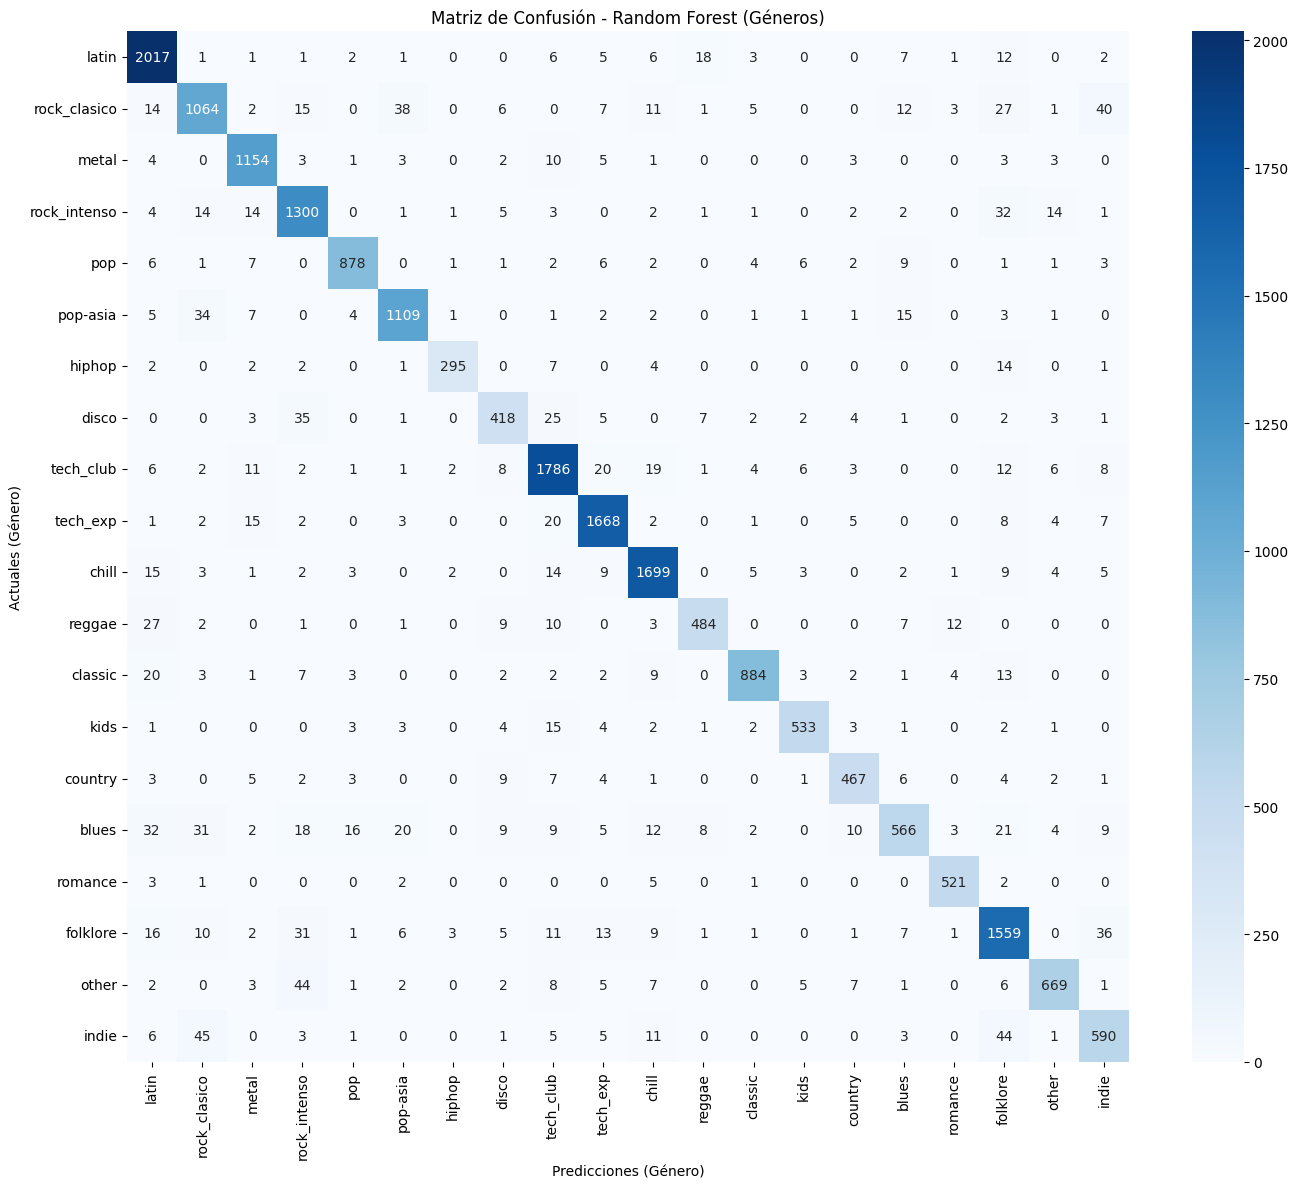

Macro F1 Score: 0.9124175184377231


In [15]:
cm = confusion_matrix(y_test, y_pred)
dic_generos_numerico = {'latin': 0, 'rock_clasico': 1, 'metal': 2, 'rock_intenso': 3, 'pop': 4, 'pop-asia': 5, 'hiphop': 6, 'disco': 7, 'tech_club': 8, 'tech_exp': 9, 'chill': 10, 'reggae': 11, 'classic': 12, 'kids': 13, 'country': 14, 'blues': 15, 'romance': 16, 'folklore': 17, 'other': 18, 'indie': 19}

dic_numeros_genero = {v: k for k, v in dic_generos_numerico.items()}

class_names = [dic_numeros_genero[i] for i in sorted(dic_numeros_genero.keys())]
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names) 
plt.title('Matriz de Confusión - Random Forest (Géneros)')
plt.xlabel('Predicciones (Género)')
plt.ylabel('Actuales (Género)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

acc = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {acc}")

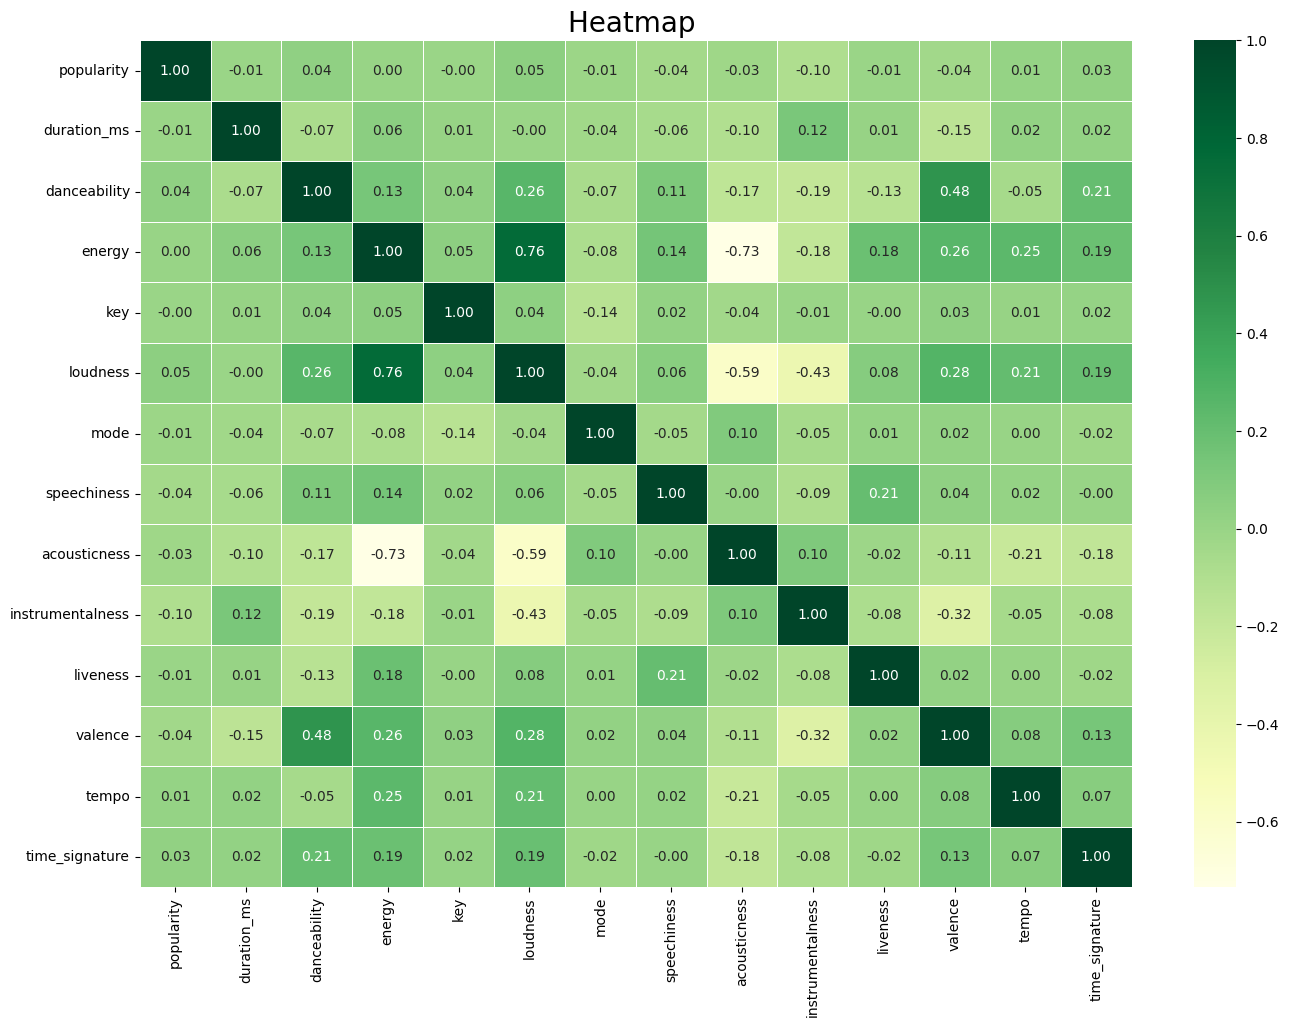

In [16]:
##Estudio de las correlaciones entre atributos

numeric_cols = df_spotify.select_dtypes(include=['number']).columns

f, ax = plt.subplots(figsize=(16, 11))

corr_matrix = df_spotify[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='YlGn', annot=True, fmt=".2f", linewidths=.5)



plt.title('Heatmap ', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
